# Analytic Report project

## Lấy dữ liệu

Dữ liệu chủ yếu được phân tích trong báo cáo là file `tmdb_5000_movies.csv`; Đây là dự liệu của gần 5000 bộ phim được thu thập từ TMDb ( The Movie Database). Nguồn dữ liệu từ Kaggle [ở đây](https://www.kaggle.com/tmdb/tmdb-movie-metadata)

 * Được tạo ngày: 2016-08-30
 * Update gần đây là: 2017-09-28

## Import library

In [1]:
# import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import json
from scipy.stats import ttest_ind, f_oneway
import scipy.stats as stats
import seaborn as sns
from itertools import chain

## Data Exploration

In [2]:
root_credits = "Dataset/tmdb_5000_credits.csv"
root_movies = "Dataset/tmdb_5000_movies.csv"
df_credits = pd.read_csv(root_credits)
df_movies = pd.read_csv(root_movies)

### Data Credits

In [3]:
df_credits.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [4]:
df = df_credits
df.shape

(4803, 4)

In [5]:
len(df["movie_id"].unique())

4803

* Dữ liệu bao gồm 4 cột : 'movie_id', 'title', 'cast' và 'crew'.
* 4803 hàng (mẫu dữ liệu).

**Ý nghĩa của các thuộc tính:**
* khóa chính là `movie_id` (không trùng lặp nhau).
* `title` là cột tên của bộ phim.
* `cast` là một list gồm nhiều dictionary, mỗi dict thông tin của mỗi diễn viên trong bộ phim.
* `crew` là một list gồm nhiều dictionary, mỗi dict thông tin thành viên trong đoàn quay phim.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


### Data Movies

In [7]:
df1 = df_movies
df1.shape

(4803, 20)

In [8]:
df1.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [9]:
len(df1["id"].unique()) # khóa chính

4803

In [10]:
df1["status"].unique() # các loại trạng thái của bộ phim

array(['Released', 'Post Production', 'Rumored'], dtype=object)

**Thông tin cơ bản:**
* Dữ liệu gồm 20 thuộc tính (cột).
* 4803 Mẫu dữ liệu (hàng).
* Những thuộc tính thiếu dữ liệu `homepage`, `tagline`.
* Thuộc tính `id` là khóa chính.
* Kiểu dữ liệu : 3 thuộc tính kiểu dữ liệu `float` (số thực) , 4 thuộc tính kiểu dữ liệu `int` (số nguyên), 1 thuộc tính kiểu `datetime` (ngày tháng) và 12 thuộc tính kiểu `object` (chuỗi hoặc bị lẫn nhiều kiểu dữ liệu).

**Ý nghĩa thuộc tính file movies:**
* "budget" là ngân sách chi trả để quay bộ phim.
* "genres" là thể loại của bộ phim.
* "homepage" là trang chủ của hãng sản xuất phim.
* "id" là định danh (khóa chính).
* "keywords" là những từ khóa để tìm kiếm bộ phim.
* "original_language" là ngôn ngữ chính của bộ phim.
* "original_title" là tên gốc của bộ phim.
* "overview" là tổng quan nội dung của bộ phim.
* "popularity" là mức độ phổ biến của phim.
* "production_companies" là công ty sản xuất bộ phim.
* "production_countries" là địa điểm sản xuất phim.
* "release_date" là ngày công chiếu bộ phim.
* "revenue" doanh thu của bộ phim.
* "runtime" là thời gian của bộ phim.
* "spoken_languages" là những ngôn ngữ được hỗ trợ trong bộ phim.
* "status" là trạng thái của bộ phim (đã phát hành, đang sản xuất, giả thiết).
* "tagline" là khẩu hiệu của bộ phim.
* "title" là tên bộ phim.
* "vote_average" là điểm iMDb của bộ phim (IMDB là Internet Movie Database).
* "vote_count" là số lượng bình chọn của người dùng.

#### Thông kê mô tả các thuộc tính

In [11]:
pd.set_option('float_format', '{:.2f}'.format)
df_movies.drop("id",axis = 1).describe() # thống kê mô tả dữ liệu số

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4803.00,4803.00,4803.00,4801.00,4803.00,4803.00
mean,29045039.88,21.49,82260638.65,106.88,6.09,690.22
std,40722391.26,31.82,162857100.94,22.61,1.19,1234.59
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,790000.00,4.67,0.00,94.00,5.60,54.00
50%,15000000.00,12.92,19170001.00,103.00,6.20,235.00
75%,40000000.00,28.31,92917187.00,118.00,6.80,737.00
max,380000000.00,875.58,2787965087.00,338.00,10.00,13752.00


In [12]:
df_movies.describe(include = np.object) # thống kê mô tả dữ liệu chuỗi 

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title
count,4803,1712,4803,4803,4803,4800,4803,4803,4802,4803,4803,3959,4803
unique,1175,1691,4222,37,4801,4800,3697,469,3280,544,3,3944,4800
top,"[{""id"": 18, ""name"": ""Drama""}]",http://www.thehungergames.movie/,[],en,Batman,Astronaut Brent is sent to rescue Taylor but c...,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,The Host
freq,370,4,412,4505,2,1,351,2977,10,3171,4795,3,2


**<font color=red>Vấn đề:</font>**
* Có thể thấy có những bộ phim có `budget` ,`revenue`, `runtime`, `vote_average`,`popularity` và `vote_count` là 0?
* Ngôn ngữ chủ yếu của các bộ phim đa phần là EN
* Phần lớn các bộ phim đều được sản xuất ở Mỹ.
* Một số thuộc tính có giá trị không đúng như `porduction_companies` , `keywords`.

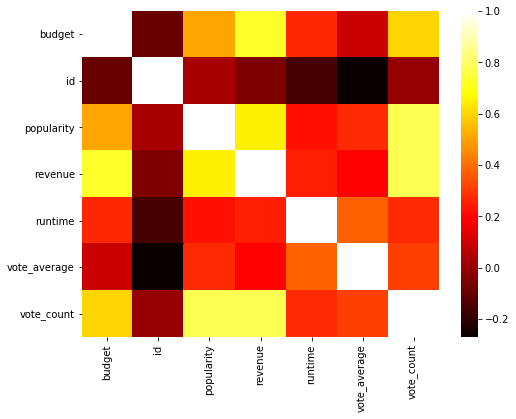

In [13]:
corr = df1.select_dtypes([np.number]).corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='hot');
# biểu đồ heatmap correlation

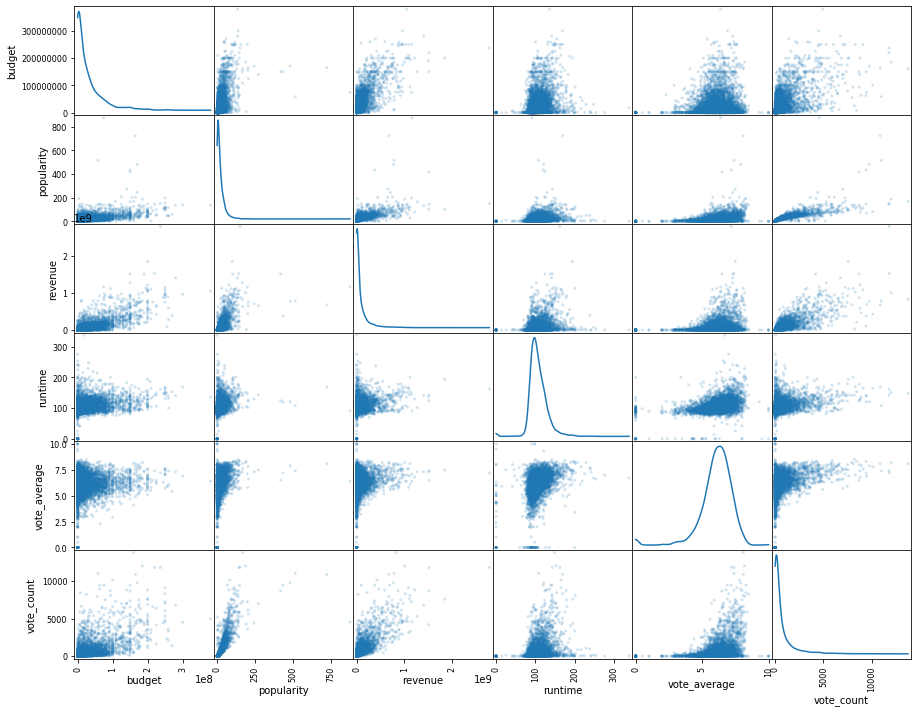

In [14]:
pd.plotting.scatter_matrix(df1.select_dtypes([np.number]).drop("id",axis = 1),figsize = (15,12), alpha=0.2,diagonal='kde')
plt.show();
# biểu đồ mối quan hệ giữa các thuộc tính matrix scatter plot

**Nhận xét:**
* `vote_count` có mối quan hệ mạnh với `popularity` và `revenue` gần đến 1.
* `budget` có mối quan hệ tốt với `revenue` khoảng 0.7

### Questions:

1. What areas have the most influence on revenue?
2. How is a movie’s revenue and average score affected by its genre?
3. What influence does release date have on revenue?

Để trả những câu hỏi chúng ta tập trung vào các thuộc tính `renvenue`, `genre`, `release_data` ,`production_countries` và `vote_average`.

#### Tiền xử lý

In [15]:
df1 = df1[df1.revenue > 0]  # loại bỏ các bộ phim có doanh thu = 0

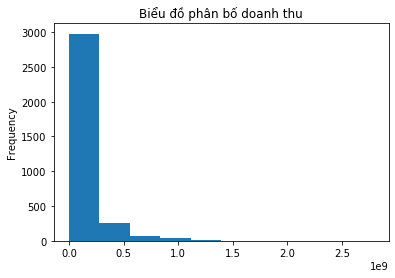

In [68]:
df1["revenue_log"] = df1["revenue"].apply(np.log10) # chuyển hóa sang phân phối chuẩn để thực hiện hypothesis testing
df1["revenue"] .plot(kind ="hist",title = "Biểu đồ phân bố doanh thu");
# biểu đồ phân bố doanh thu

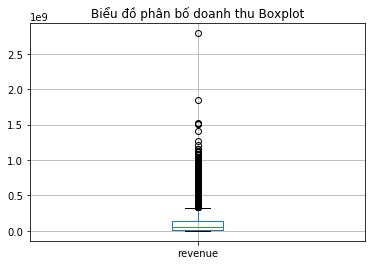

In [67]:
df1.boxplot(column=['revenue'])
plt.title("Biểu đồ phân bố doanh thu Boxplot");
# biểu đồ phân bố boxplot

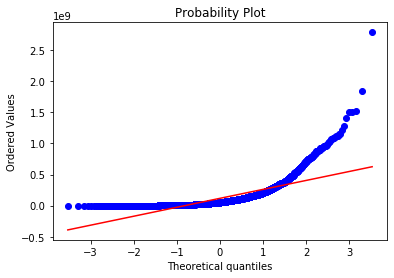

In [64]:
plt.subplot(111)
stats.probplot(df1["revenue"], dist="norm", plot=plt)
plt.show()
# biểu đồ phân bố theo 

**Nhận xét:** 
* Doanh thu bộ phim không tuân theo phân phối chuẩn (phân phối long tail).
* Phần lớn các bộ phim chưa đến dưới 500000000.
* Doanh thu trung bình nhỏ chỉ gần 110000000.

### 1. What areas have the most influence on revenue?

* Bước 1: Tiền xử lý cột `production_countries` để lấy tất cả khu vực sản xuất phim.
* Bước 2: Sử dụng kiểm định ANOVA để kiểm tra liệu có sự ảnh hưởng của `area` đối với `renvenue` hay không?.
* Bước 3: Tính doanh thu trung bình của các khu vực và lấy khu vực có doanh thu trung bình lớn nhất.

Bước 1

In [69]:
# xử lý lấy chuỗi tên khu vực format kv,kv,..
area = df1["production_countries"].apply(lambda x: json.loads(x))
def getarea(x):
    li = []
    if not x:
        return float("NaN")
    for i in x:
        li.append(i["name"])
    return ",".join(li)
df1["area"] = area.apply(getarea)
df1["area"].head(1)

0    United States of America,United Kingdom
Name: area, dtype: object

In [70]:
# xử lý lấy chuỗi ID khu vực format = idkv,idkv,.. 
ctr = df1["production_countries"].str.extractall('"(\w{2})"').unstack(1)[0]
#cách 1
df1["countries"] = ctr.apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
# cách 2
# ctr.values.tolist()
df1["countries"].head(1)

0    US,GB
Name: countries, dtype: object

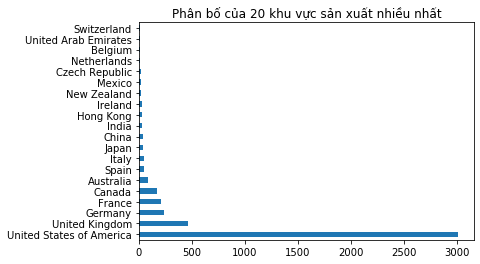

In [61]:
# lấy số lượng bộ phim mỗi khu vực
area = df1["area"].str.split(",",expand =True) 
area = area.apply(pd.Series.value_counts).fillna(0).sum(axis =1)
area.sort_values(ascending = False).head(20).plot.barh(title = "Phân bố của 20 khu vực sản xuất nhiều nhất"); # xét 63 / 88 khu vực có doanh thu > 0 
# (vẽ phân bố của 20 khu vực sản xuất nhiều nhất)

**Nhận xét:** 
* Phần lớn các bộ phim được quay ở các đất nước phát triển mạnh (Bắc Mỹ, Châu Âu, Châu Đại Dương, Một vài nước châu Á).
* Hầu hết các bộ phim đều sẽ có quay ở Mỹ. 

In [22]:
# những area có giá trị nan khi extract 
df1 = df1.dropna(subset = ["area"]) # xóa những bộ phim không có khu vực

Bước 2

Phát biểu giả thuyết:
* $H_{0}$ : DOanh thu không có sự khác nhau giữa các khu vực sản xuất.
* $H_{1}$ : Doanh thu có sự khác biệt giữa các khu vực sản xuất.

In [23]:
f_oneway(*(df1[df1["area"].str.contains(i)]["revenue_log"] for i in area.index))

F_onewayResult(statistic=3.059075848259882, pvalue=1.765337798725877e-14)

**Kết luận:** 
* `p_value` <= 0.05 do đó ta có thể bác bỏ giả thuyết $H_{0}$ chấp nhận giả thuyết $H_{1}$ tức nơi sản xuất phim có ảnh hưởng đến doanh thu của bộ phim đó.

Bước 3

<ipython-input-71-e51d52356917>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["area"] = df["area"].str.split(",") # chuyển string sang list


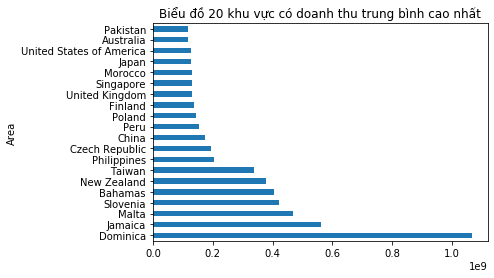

In [71]:
df = df1[["area","revenue"]]
df["area"] = df["area"].str.split(",") # chuyển string sang list
L = df["area"].values # lấy các giá trị của khu vực
# chuyển mỗi list area thành các mẫu dữ liệu
df = pd.DataFrame({'revenue' : df['revenue'].values.repeat([len(x) for x in L]),'Area' : list(chain.from_iterable(L))}) 
df.groupby("Area")["revenue"].mean().sort_values(ascending =False).head(20).\
plot.barh(title="Biểu đồ 20 khu vực có doanh thu trung bình cao nhất");
# biểu đồ 20 khu vực có doanh thu trung bình cao nhất.

**Nhận xét:**
* Thường là các khu vực thuộc vùng biển Cari-bê (`Dominica, Bahamas, Jamaica`).
* Những khu vực có khung cảnh thiên nhiên, biển đẹp.

### Questions 3: What influence does release date have on revenue?

* Bước 1: Tiền xử lý cột `release_date` chuyển sang kiểu dữ liệu datetime, lấy `month` từ datatime.
* Bước 2: Kiểm định ANOVA để kiểm tra `release date`(dựa trên tháng) thực tế có ảnh hưởng `revenue` không? 
* Bước 3: Vẽ biểu đồ doanh thu trung bình theo tháng của tất cả bộ phim hoặc biểu đồ tỷ lệ những tháng có doanh thu đạt trong top 100 so với số bộ phim trong trong tháng đó.

Bước 1

In [25]:
df1["date"] = pd.to_datetime(df1["release_date"],format = "%Y-%m-%d")
df1["month"] = df1["date"].dt.month

In [26]:
len(df1["date"].unique()) # số lượng mẫu quá ít để thấy sự khác biệt về doanh thu bởi ngày công chiếu

2550

In [27]:
df1[df1["date"].isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,revenue_log,area,countries,date,month


Bước 2

Phát biểu giả thuyết:
* $H_{0}$ : Doanh thu không có sự khác nhau giữa các thời gian công chiếu khác nhau.
* $H_{1}$ : Doanh thu khác nhau với các thời gian công chiếu khác nhau.

In [28]:
f_oneway(*(df1[df1["month"] == i]["revenue_log"] for i in df1["month"].unique()))

F_onewayResult(statistic=15.588961021728098, pvalue=3.9510664215255845e-30)

**Kết luận:**
* p_Value < 0.05 do đó bác bỏ giả thuyết $H_{0}$ và chấp nhận giả thuyết $H_{1}$ tức là thời gian công chiếu phim có sự ảnh hưởng đến doanh thu của bộ phim.

Bước 3

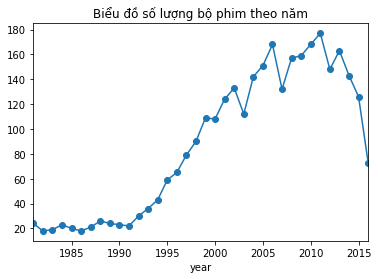

In [54]:
df1["year"] = df1["date"].dt.year
df = df1[df1["year"] > 1980].groupby("year")["year"].count()
df.sort_index().plot.line(title = "Biểu đồ số lượng bộ phim theo năm",marker = "o");
# biểu đồ số lượng bộ phim theo năm

**Nhận xét:**
* Số lượng bộ phim sản xuất trong năm theo thời gian càng lúc càng tăng.
* Điều bất thường là trong năm 2013-1014-2015 số lượng bộ phim liền tục giảm.

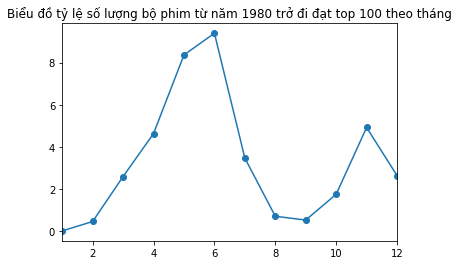

In [53]:
mt = df1[df1["year"] > 1980].sort_values("revenue",ascending = False)["month"].head(100).value_counts()
mc = df1[df1["year"] > 1980]["month"].value_counts()
(mt/mc*100).fillna(0).plot.line(title = "Biểu đồ tỷ lệ số lượng bộ phim từ năm 1980 trở đi đạt top 100 theo tháng",marker = "o");
# biểu đồ tỷ lệ số lượng bộ phim từ năm 1980 trở đi đạt top 100 theo tháng

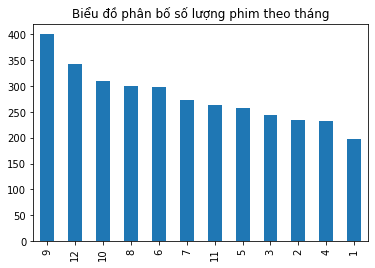

In [52]:
df1["month"].value_counts().plot.bar(title = "Biểu đồ phân bố số lượng phim theo tháng");
# biểu đồ phân bố số lượng phim theo tháng.

**Nhận xét:**
* Mặc dù số bộ phim trong tháng 9 khá nhiều nhưng doanh thu trung bình lại rất thấp.

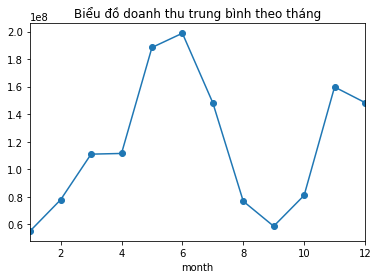

In [51]:
df1.groupby("month")["revenue"].mean().plot.line(title = "Biểu đồ doanh thu trung bình theo tháng",marker = "o");
# biểu đồ doanh thu trung bình theo tháng.

**Nhận xét:** 
* Tháng có doanh thu trung bình cao nhất là tháng 5-6.
* Nguyên nhân: có thể tháng 5-6 là tháng nghỉ hè nên lượng người đi xem phim nhiều.

### Question 2: How is a movie’s revenue and average score affected by its genre?

* Bước 1: Tiền xử lý cột `genre` và `average`
* Bước 2: Kiểm định ANOVA để kiểm tra thực tế `genre` có ảnh hưởng `revenue` và `vote_average` không?
* Bước 3: Biểu diễn các loại biểu để xem xét  `genres` ảnh hưởng thế nào tới `revenue` và `vote_average` 

Bước 1

In [33]:
genres = df1["genres"].apply(lambda x: json.loads(x))

def getgenres(x):
    li = []
    if not x:
        return float("NaN")
    for i in x:
        li.append(i["name"])
    return ",".join(li)

df1["genres_new"] = genres.apply(getgenres)

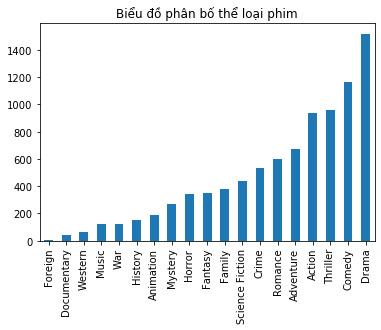

In [49]:
df_genres = df1["genres_new"].str.split(",",expand = True)
s = df_genres.apply(pd.Series.value_counts).fillna(0).sum(axis = 1)
s.sort_values().plot.bar(title= "Biểu đồ phân bố thể loại phim");
# biểu đồ phân bố thể loại phim.

**Nhận xét:** 
* Những thể loại phim được sản xuất nhiều như `Drama`, `Comedy`, `Action` và `Thriller`.

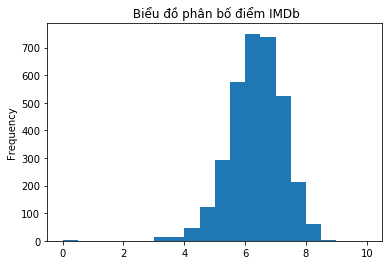

In [48]:
df1.vote_average.plot.hist(title = " Biểu đồ phân bố điểm IMDb",bins=20);
# biểu đồ phân bố điểm IMDb

**Nhận xét:**
* Điểm IMDb có phân phối chuẩn.
* Điểm IMDb của bộ phim tập trung chủ yếu trong khoảng 6-7.
* Chưa tới 100 bộ phim > 8. trong gần 5000 bộ phim.

Bước 2

Phát biểu giả thuyết:
* $H_{0}$ : Doanh thu hoặc điểm IMDb không có sự khác nhau giữa các thể loại phim. 
* $H_{1}$ : Doanh thu hoặc điểm IMDb khác nhau giữa các thể loại phim.

In [36]:
f_oneway(*(df1[df1["genres_new"].str.contains(i)]["revenue_log"] for i in s.index))

F_onewayResult(statistic=31.426370404490854, pvalue=5.573346957096217e-105)

In [37]:
f_oneway(*(df1[df1["genres_new"].str.contains(i)]["vote_average"] for i in s.index))

F_onewayResult(statistic=32.869946377634, pvalue=3.9497106963955704e-110)

**Kết luận:**
* p_value vô cùng nhỏ và < 0.05 do đó bác bỏ giả thuyết $H_{0}$ và chấp nhận giả thuyết $H_{1}$ tức là các thể loại có ảnh hưởng đến doanh thu và điểm IMDb của bộ phim.

Bước 3

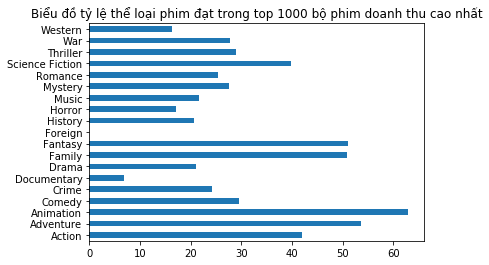

In [46]:
t = df1.nlargest(1000,"revenue")["genres_new"].str.split(",",expand = True).apply(pd.Series.value_counts).sum(axis = 1)
(t/s*100).fillna(0).plot.barh(title = "Biểu đồ tỷ lệ thể loại phim đạt trong top 1000 bộ phim doanh thu cao nhất");
# biểu đồ tỷ lệ thể loại phim đạt trong top 1000 bộ phim doanh thu cao nhất.

**Nhận xét:**
* Có thể thấy tỷ lệ thể loại phim `Animation` có doanh thu rất cao và cao nhất trong các thể loại.
* Loại phim `Animation` có sức tác động lớn nhất đến doanh thu.
* Nguyên nhân : thể loại `Animation` phù hợp với rất nhiều đối tượng từ trẻ nhỏ đến người lớn.

<ipython-input-72-563003518582>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["genres"] = df["genres_new"].str.split(",")


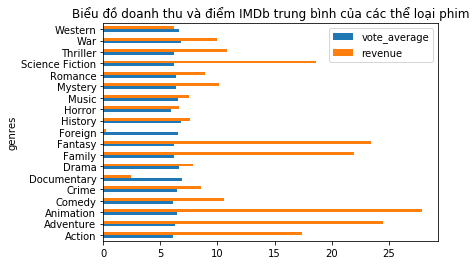

In [72]:
df = df1[["genres_new","revenue","vote_average"]]
df["genres"] = df["genres_new"].str.split(",")
L = df["genres"].values
df = pd.DataFrame({'revenue' : df['revenue'].values.repeat([len(x) for x in L]),'vote_average' : df['vote_average'].values.repeat([len(x) for x in L]),'genres' : list(chain.from_iterable(L))})
df_mean = df.groupby("genres")["vote_average","revenue"].mean()
df_mean["revenue"] = df_mean["revenue"]/ 10000000
df_mean.plot.barh(title = "Biểu đồ doanh thu và điểm IMDb trung bình của các thể loại phim");
# Biểu đồ doanh thu và điểm IMDb trung bình của các thể loại phim

**Nhận xét:**
* Độ lệch chuẩn của điểm IMDb rất thấp và trung bình trong khoảng 6.0
* Doanh thu có hình dạng khá tương đồng với biểu đồ tỷ lệ đạt doanh thu top.

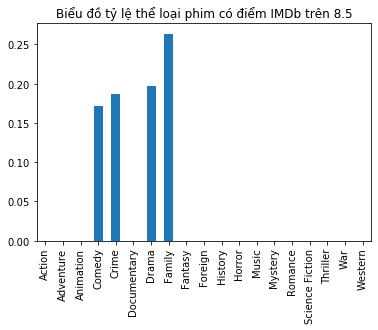

In [42]:
imdb = df[df["vote_average"]>=8.5]["genres"].value_counts()
(imdb/s*100).fillna(0).plot.bar(title = "Biểu đồ tỷ lệ thể loại phim có điểm IMDb trên 8.5");
# biểu đồ tỷ lệ thể loại phim có điểm IMDb trên 8.5

**Nhận xét:**
* `Comedy, Family, Drama, Crime` thường có tỷ lệ điểm IMDb cao.

### Conclusions

* Các bộ phim nên được công chiếu trong những khoảng thời gian ngày nghỉ dài như hè, nghỉ tết.
* Khu vực có sức ảnh hưởng nhất đến doanh thu là các khu vực thuộc vùng biển ca-ri-bê.
* Những thể loại phim như `Animation , Adventure, Family, Fantasy` thường đạt được doanh thu cao (phù hợp phần lớn các đối tượng người xem phim).
* Những loại bộ phim có khả năng đạt điểm IMDb cao như `Comedy, Family, Drama`
(vì những bộ đánh động đúng tâm lý người xem và gây những ấn tượng sâu sắc đối với cảm xúc). 